In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import pyMELTScalc as M
import PySulfSat as ss

sys.path.append(r'H:\My Drive\2022\GitHub\pyMELTScalc\MELTS')

import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

In [2]:
M.__version__

'0.0.12'

In [3]:
Exp = pd.read_excel('NeaveExperiments\Villiger2007.xlsx')
Elements = ['SiO2_Liq', 'TiO2_Liq', 'Al2O3_Liq', 'FeOt_Liq', 'MgO_Liq',
            'CaO_Liq', 'Na2O_Liq', 'K2O_Liq']

#Pet = ss.import_data(filename = 'NeaveExperiments/Villiger2007_Petrolog_noOpx.xlsx', Petrolog = True)

In [4]:
bulk = {'SiO2_Liq': Exp['SiO2_Liq'].loc[0], 
        'TiO2_Liq': Exp['TiO2_Liq'].loc[0], 
        'Al2O3_Liq': Exp['Al2O3_Liq'].loc[0], 
        'FeOt_Liq': Exp['FeOt_Liq'].loc[0], 
        'MnO_Liq': Exp['MnO_Liq'].loc[0], 
        'MgO_Liq': Exp['MgO_Liq'].loc[0], 
        'CaO_Liq': Exp['CaO_Liq'].loc[0], 
        'Na2O_Liq': Exp['Na2O_Liq'].loc[0], 
        'K2O_Liq': Exp['K2O_Liq'].loc[0],
        'P2O5_Liq': 0.0,
        'H2O_Liq': 0.2, 
        'CO2_Liq': 0.0,
       'Fe3Fet_Liq': 0.0}

#49.39	1.53	14.08	0.06	10.25	0.18	10.32	12.05	1.95	0.21	0.17


In [5]:
bulk

{'SiO2_Liq': 48.67,
 'TiO2_Liq': 0.57,
 'Al2O3_Liq': 14.55,
 'FeOt_Liq': 7.56,
 'MnO_Liq': 0.14,
 'MgO_Liq': 14.81,
 'CaO_Liq': 11.73,
 'Na2O_Liq': 1.5,
 'K2O_Liq': 0.08,
 'P2O5_Liq': 0.0,
 'H2O_Liq': 0.2,
 'CO2_Liq': 0.0,
 'Fe3Fet_Liq': 0.0}

In [6]:
Exp[Elements] = 100*Exp[Elements].values/np.nansum(Exp[Elements], axis = 1).reshape(8,1)
#Pet[Elements] = 100*Pet[Elements].values/np.nansum(Pet[Elements], axis = 1).reshape(71,1)

In [7]:
P_bar = np.array([1000,4000,7000,10000])

# Results_Holland = M.multi_path(Model = "Holland", comp = bulk,
#                        T_end_C = 1000, dt_C = 2, 
#                        P_bar = P_bar, find_liquidus = True,
#                        H2O_Liq = 0.2,
#                        Frac_solid = True, Frac_fluid = True,
#                       fO2_buffer = "NNO", fO2_offset = 0)

Results_MELTS = M.multi_path(Model = "MELTSv1.2.0", comp = bulk,
                       T_end_C = 1000, dt_C = 2, 
                       P_bar = P_bar, find_liquidus = True,
                       H2O_Liq = 0.2,
                       Frac_solid = True, Frac_fluid = True,
                      fO2_buffer = "NNO", fO2_offset = 0)

  0%|          | 0/1 [00:00<?, ?it/s]

Running MELTSv1.2.0 calculations 0 to 3.0 ... Complete (time taken = 76.86 seconds)


In [8]:
import pickle
with open('Results_Holland.pck', 'rb') as f:
    Results_Holland = pickle.load(f)
    
# with open('Results_MELTS.pck', 'rb') as f:
#     Results_MELTS = pickle.load(f)

In [9]:
Pet = pd.read_excel('NeaveExperiments/Villiger2007_Petrolog_Liq.xlsx')
Pet[Elements] = 100*Pet[Elements].values/np.nansum(Pet[Elements], axis = 1).reshape(100,1)

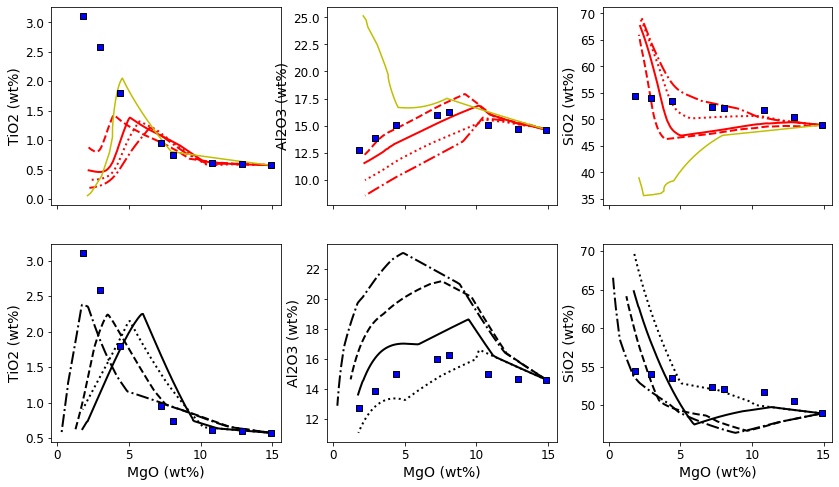

In [10]:
f, a = plt.subplots(2,3, figsize = (14,8), sharex = True)

y = ['TiO2_Liq', 'Al2O3_Liq', 'SiO2_Liq']

for index in Results_Holland:
    Results_Holland[index]['liq'][Elements] = 100*Results_Holland[index]['liq'][Elements].values/np.nansum(Results_Holland[index]['liq'][Elements], axis = 1).reshape(len(Results_Holland[index]['liq']['SiO2_Liq']),1)
    Results_MELTS[index]['All'][Elements] = 100*Results_MELTS[index]['All'][Elements].values/np.nansum(Results_MELTS[index]['All'][Elements], axis = 1).reshape(len(Results_MELTS[index]['All']['SiO2_Liq']),1)

lines = [':', '-', '--', '-.']    

for i in range(3):
    for j in range(len(P_bar)):
        a[0][i].plot(Results_Holland['index = ' + str(int(j))]['liq']['MgO_Liq'],
             Results_Holland['index = ' + str(int(j))]['liq'][y[i]], lines[j], linewidth = 2, color = 'r')  
        a[1][i].plot(Results_MELTS['index = ' + str(int(j))]['All']['MgO_Liq'],
             Results_MELTS['index = ' + str(int(j))]['All'][y[i]], lines[j], linewidth = 2, color = 'k')
        
    a[0][i].plot(Pet['MgO_Liq'], Pet[y[i]], '-', color = 'y')
    a[0][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk',
                markerfacecolor = 'blue')
    a[0][i].set_ylabel(y[i][:-4] + ' (wt%)')
    
    a[1][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk',
                markerfacecolor = 'blue')
    a[1][i].set_ylabel(y[i][:-4] + ' (wt%)')
    
    a[1][i].set_xlabel('MgO (wt%)')
    
plt.savefig("Villiger.eps", dpi = 300, bbox_inches='tight')  

In [11]:
import pickle

with open('Results_Holland.pck', 'wb') as f:
    pickle.dump(Results_Holland,f)
    
with open('Results_MELTS.pck', 'wb') as f:
    pickle.dump(Results_MELTS,f)

In [12]:
V_10kbar = pd.read_excel('Villiger_10kbar.xlsx')
V_7kbar = pd.read_excel('Villiger_7kbar.xlsx')
V_1kbar = pd.read_excel('Villiger_1kbar.xlsx')

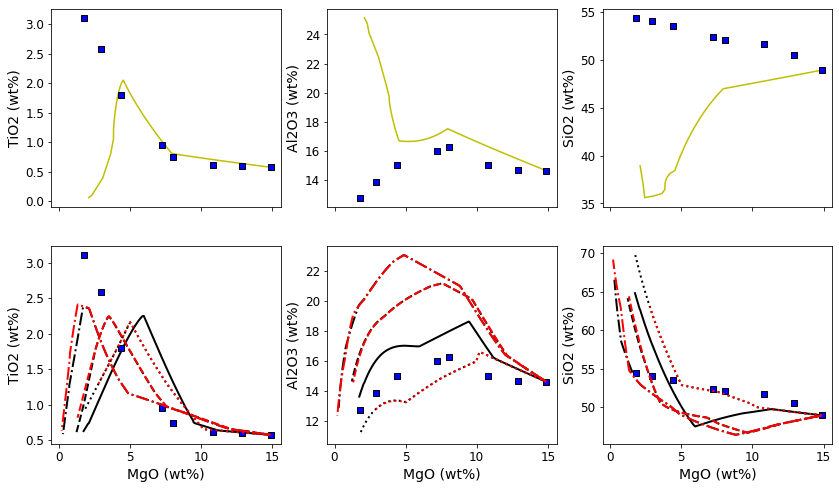

In [13]:
f, a = plt.subplots(2,3, figsize = (14,8), sharex = True)

y = ['TiO2_Liq', 'Al2O3_Liq', 'SiO2_Liq']

lines = [':', '-', '--', '-.']    

V_10kbar[Elements] = 100*V_10kbar[Elements].values/np.nansum(V_10kbar[Elements], axis = 1).reshape(len(V_10kbar['SiO2_Liq']),1)
V_7kbar[Elements] = 100*V_7kbar[Elements].values/np.nansum(V_7kbar[Elements], axis = 1).reshape(len(V_7kbar['SiO2_Liq']),1)
V_1kbar[Elements] = 100*V_1kbar[Elements].values/np.nansum(V_1kbar[Elements], axis = 1).reshape(len(V_1kbar['SiO2_Liq']),1)
    
for i in range(3):
    for j in range(len(P_bar)):
#         a[0][i].plot(Results_Holland['index = ' + str(int(j))]['liq']['MgO_Liq'],
#              Results_Holland['index = ' + str(int(j))]['liq'][y[i]], lines[j], linewidth = 2, color = 'r')  
        a[1][i].plot(Results_MELTS['index = ' + str(int(j))]['All']['MgO_Liq'],
             Results_MELTS['index = ' + str(int(j))]['All'][y[i]], lines[j], linewidth = 2, color = 'k')
        
    a[0][i].plot(Pet['MgO_Liq'], Pet[y[i]], '-', color = 'y')
    a[0][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk',
                markerfacecolor = 'blue')
    a[0][i].set_ylabel(y[i][:-4] + ' (wt%)')
    
    a[1][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk',
                markerfacecolor = 'blue')
    a[1][i].set_ylabel(y[i][:-4] + ' (wt%)')
    
    a[1][i].set_xlabel('MgO (wt%)')
    
    a[1][i].plot(V_7kbar['MgO_Liq'], V_7kbar[y[i]], lines[2], linewidth = 2, color = 'r')
    a[1][i].plot(V_10kbar['MgO_Liq'], V_10kbar[y[i]], lines[3], linewidth = 2, color = 'r')
    a[1][i].plot(V_1kbar['MgO_Liq'], V_1kbar[y[i]], lines[0], linewidth = 2, color = 'r')

In [14]:
Results_MELTS['index = 0']['Mass']

,liquid1,olivine1,plagioclase1,clinopyroxene1,clinopyroxene2,spinel1,olivine1_sum,plagioclase1_sum,clinopyroxene1_sum,clinopyroxene2_sum,spinel1_sum
0,100.158023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,99.914923,0.242837,0.000000,0.000000,0.000000,0.000000,0.242837,0.000000,0.000000,0.000000,0.000000
2,99.662980,0.253127,0.000000,0.000000,0.000000,0.000000,0.495964,0.000000,0.000000,0.000000,0.000000
3,99.413019,0.251148,0.000000,0.000000,0.000000,0.000000,0.747113,0.000000,0.000000,0.000000,0.000000
4,99.165017,0.249189,0.000000,0.000000,0.000000,0.000000,0.996302,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
165,10.107942,0.000000,0.056844,0.020221,0.010115,0.016109,17.802920,36.714259,26.731194,6.784975,2.986686
166,10.016465,0.000000,0.055919,0.019746,0.009827,0.015678,17.802920,36.770178,26.750940,6.794801,3.002364
167,9.927022,0.000000,0.055019,0.019293,0.009549,0.015265,17.802920,36.825197,26.770233,6.804350,3.017630
168,9.839544,0.000000,0.054143,0.018860,0.009280,0.014870,17.802920,36.879341,26.789093,6.813630,3.032499


In [15]:
from meltsdynamic import MELTSdynamic
liquidus = MELTSdynamic(1)

Setting calculation mode to rhyolite-MELTS 1.0.2.


In [16]:
bulk = [bulk['SiO2_Liq'],bulk['TiO2_Liq'],bulk['Al2O3_Liq'], 0.0, 0.0,
        bulk['FeOt_Liq'],bulk['MnO_Liq'],bulk['MgO_Liq'],0.0,0.0,
        bulk['CaO_Liq'],bulk['Na2O_Liq'],bulk['K2O_Liq'],0.0,0.2, 0.0, 0.0, 0.0, 0.0]

h2o = [0.2]
co2 = [0.0]

emptydf = pd.DataFrame()
for i in range(len(h2o)):
    bulk[14] = h2o[i]
    for j in range(len(co2)):
        bulk[15] = co2[j]
        emptydf = emptydf.append(pd.DataFrame([bulk]), ignore_index=True)
emptydf.columns = (liquidus.endMemberFormulas['bulk'])
emptydf

,sio2,tio2,al2o3,fe2o3,cr2o3,feo,mno,mgo,nio,coo,cao,na2o,k2o,p2o5,h2o,co2,so3,cl2o-1,f2o-1
0,48.67,0.57,14.55,0.0,0.0,7.56,0.14,14.81,0.0,0.0,11.73,1.5,0.08,0.0,0.2,0.0,0.0,0.0,0.0


In [ ]:
# perform MELTS calculation:
for i in range(emptydf.shape[0]):
    bulk = emptydf.iloc[[i]].values.flatten().tolist()
    pressure = [1000] # in bars
    temperature = [1400.0] # Celcius 
    for t,p in zip(temperature,pressure):
        print(bulk)
        liquidus.engine.setBulkComposition(bulk)
        liquidus.engine.temperature = t
        liquidus.engine.pressure = p
        print(i, liquidus.engine.setBulkComposition(bulk), liquidus.engine.temperature, liquidus.engine.pressure)
        # comment out if no buffer required
        liquidus.engine.setSystemProperties("Log fO2 Path", "NNO")
        liquidus.engine.setSystemProperties("Mode", "Fractionate Solids")
        #liquidus.engine.setSystemProperties("Mode", "Fractionate Water")
        liquidus.engine.setSystemProperties("Mode", "Fractionate Fluids")
        print(liquidus.engine.status.message)
        
        while liquidus.engine.temperature >= 700:
            liquidus = liquidus.addNodeAfter()
            liquidus.engine.temperature = liquidus.engine.temperature - 3
            liquidus.engine.calcEquilibriumState(1,1) #bulk updated after fractionation
            print(liquidus.engine.solidNames)
        # need some code here that will create a new file/folder for each run. 

[48.67, 0.57, 14.55, 0.0, 0.0, 7.56, 0.14, 14.81, 0.0, 0.0, 11.73, 1.5, 0.08, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0]
0 None 1400.0 1000
None
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['olivine1']
['olivine1']
['olivine1']
['olivine1']
['olivine1']
['olivine1']
['olivine1']
['olivine1']
['olivine1']
['olivine1']
['olivine1']
['olivine1']
['olivine1']
['olivine1']
['olivine1']
['olivine1']
['olivine1']
['olivine1']
['olivine1']
['olivine1']
['olivine1']
['olivine1']
['olivine1']
['olivine1']
['olivine1']
['olivine1']
['olivine1']
['olivine1']
['olivine1']
['olivine1']
['olivine1']
['olivine1']
['olivine1']
['olivine1']
['olivine1']
['olivine1']
['olivine1']
['olivine1']
['olivine1']
['olivine1']
['olivine1', 'plagioclase1']
['olivine1', 'clinopyroxene1', 'plagioclase1']
['olivine1', 'clinopyroxene1', 'plagioclase1']
['olivine1', 'clinopyroxene1', 'plagioclase1']
['olivine1', 'clinopyroxene1', 'plagioclase1']
['olivine1', 'clinopyroxene1', 'plagioclase1']
['olivine1', 'clinopyrox

['olivine1', 'clinopyroxene1', 'plagioclase1', 'tridymite1', 'rutile1', 'spinel1']
['olivine1', 'clinopyroxene1', 'plagioclase1', 'tridymite1', 'rutile1', 'spinel1']
['olivine1', 'clinopyroxene1', 'plagioclase1', 'tridymite1', 'rutile1', 'spinel1']
['olivine1', 'clinopyroxene1', 'plagioclase1', 'tridymite1', 'rutile1', 'spinel1']
['olivine1', 'clinopyroxene1', 'plagioclase1', 'tridymite1', 'rutile1', 'spinel1']
['olivine1', 'clinopyroxene1', 'plagioclase1', 'tridymite1', 'rutile1', 'spinel1']
['olivine1', 'clinopyroxene1', 'plagioclase1', 'tridymite1', 'rutile1', 'spinel1']
['olivine1', 'clinopyroxene1', 'plagioclase1', 'tridymite1', 'rutile1', 'spinel1', 'water1']
['olivine1', 'plagioclase1', 'tridymite1', 'rutile1', 'water1']
['olivine1', 'plagioclase1', 'tridymite1', 'rutile1', 'water1']
['olivine1', 'plagioclase1', 'tridymite1', 'rutile1', 'water1']
['olivine1', 'plagioclase1', 'tridymite1', 'rutile1', 'water1']
['olivine1', 'plagioclase1', 'tridymite1', 'rutile1', 'water1']
['oliv

In [ ]:
liquidus.engine.solidNames